In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy_financial
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install plotly.express

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


plt.style.use('dark_background')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

# This api key needs to be removed prior to upload to GITHUB and instructions:
# 1.) go to the following link https://fred.stlouisfed.org/docs/api/api_key.html and sign up for your own key
# 2.) once you have a API key you will need to copy and paste the key below inside the single quotations.

fred_key = 'put your FRED API Key here'

# 1.) Creation of the FRED Object

In [2]:
fred = Fred(api_key=fred_key)

# 2.) Search FRED API for Economic Data

In [3]:
sp_search = fred.search('New Zealand Residential', order_by = 'popularity')

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
QNZN628BIS,QNZN628BIS,2022-09-13,2022-09-13,Residential Property Prices for New Zealand,1970-01-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-07-28 11:01:10-05:00,23,Source Code: Q:NZ:N:628 Coverage includes all...
QNZR628BIS,QNZR628BIS,2022-09-13,2022-09-13,Real Residential Property Prices for New Zealand,1970-01-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-07-28 11:01:08-05:00,17,Source Code: Q:NZ:R:628 Coverage includes all...
QNZN368BIS,QNZN368BIS,2022-09-13,2022-09-13,Residential Property Prices for New Zealand,1971-01-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-07-28 11:01:14-05:00,5,Source Code: Q:NZ:N:368 Coverage includes all...
QNZR368BIS,QNZR368BIS,2022-09-13,2022-09-13,Real Residential Property Prices for New Zealand,1971-01-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-07-28 11:01:15-05:00,4,Source Code: Q:NZ:R:368 Coverage includes all...
NZLODCNPI03MLM,NZLODCNPI03MLM,2022-09-13,2022-09-13,Orders: Construction: Permits issued: Dwelling...,1965-04-01,2022-05-01,Monthly,M,Number,Number,Not Seasonally Adjusted,NSA,2022-07-14 16:19:59-05:00,1,OECD descriptor ID: ODCNPI03 OECD unit ID: ML ...


# 3.) Pull request from FRED API for raw data and Plot

<AxesSubplot:title={'center':'Dwellings & Residential Bldg Permits Issued for Construction: NZ'}>

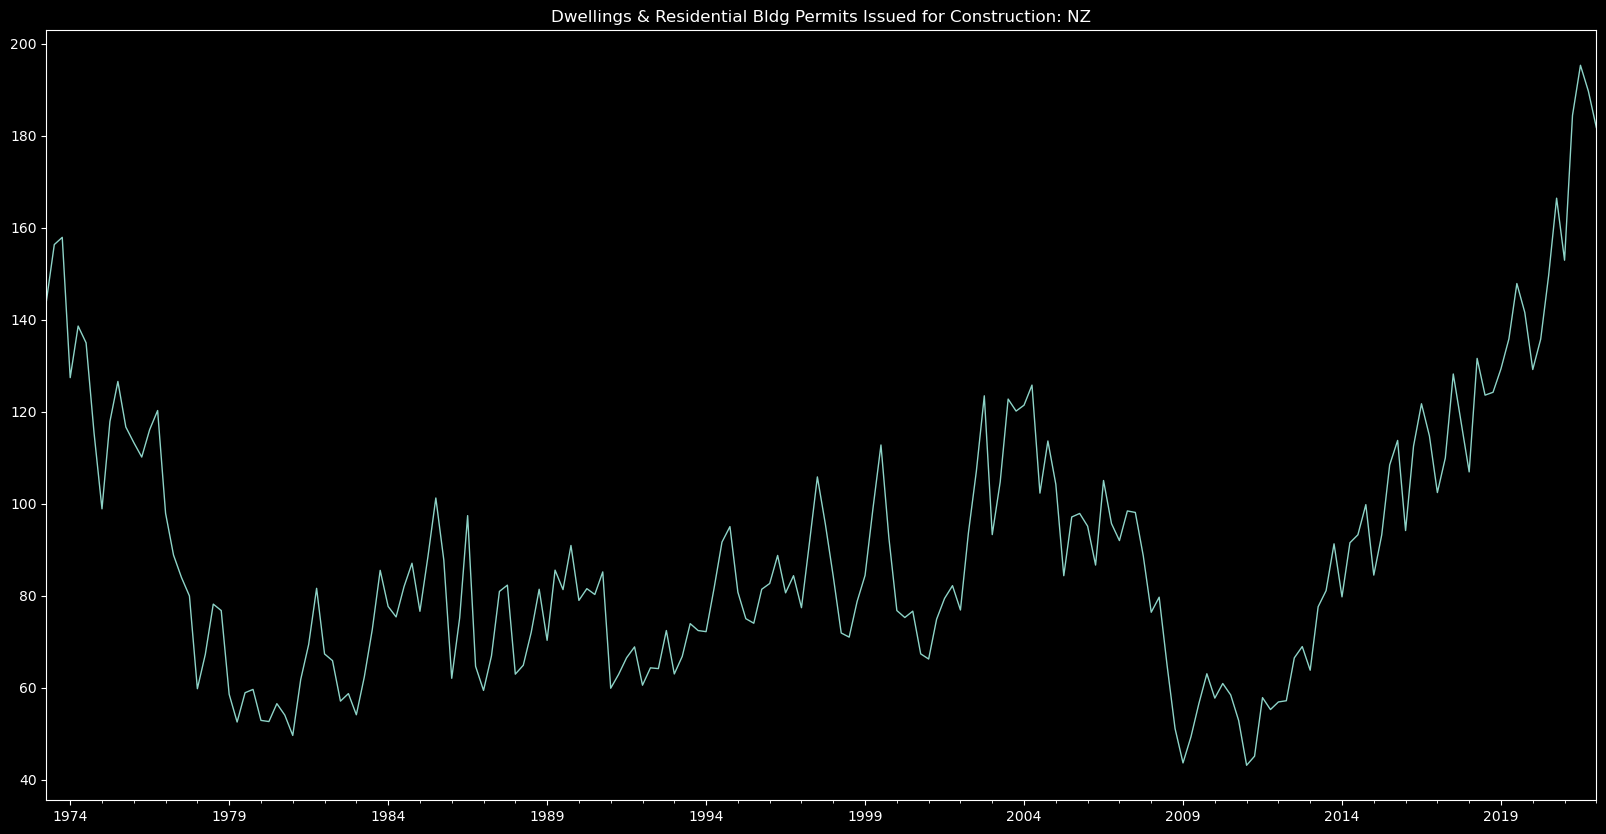

In [5]:
# Data Source: https://fred.stlouisfed.org/series/ODCNPI03NZQ661N Quarterly
CPDRBNZ = fred.get_series(series_id='ODCNPI03NZQ661N')
CPDRBNZ.plot(figsize=(20, 10), title='Dwellings & Residential Bldg Permits Issued for Construction: NZ', lw=1)
# Data Citation: Organization for Economic Co-operation and Development, Dwellings and Residential Buildings Permits Issued for Construction for New Zealand [ODCNPI03NZQ661N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ODCNPI03NZQ661N, September 9, 2022.

# 4.) Pull and Join Multiple Data Series

In [63]:
RPP_df = fred.search('New Zealand Residential', filter=('frequency', 'Quarterly'))
RPP_df = RPP_df.query('seasonal_adjustment =="Not Seasonally Adjusted"')
RPP_df.loc[RPP_df['title'].str.contains('Residential')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
QNZN628BIS,QNZN628BIS,2022-09-09,2022-09-09,Residential Property Prices for New Zealand,1970-01-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-07-28 11:01:10-05:00,25,Source Code: Q:NZ:N:628 Coverage includes all...
QNZN368BIS,QNZN368BIS,2022-09-09,2022-09-09,Residential Property Prices for New Zealand,1971-01-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-07-28 11:01:14-05:00,9,Source Code: Q:NZ:N:368 Coverage includes all...
QNZR628BIS,QNZR628BIS,2022-09-09,2022-09-09,Real Residential Property Prices for New Zealand,1970-01-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-07-28 11:01:08-05:00,16,Source Code: Q:NZ:R:628 Coverage includes all...
QNZR368BIS,QNZR368BIS,2022-09-09,2022-09-09,Real Residential Property Prices for New Zealand,1971-01-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-07-28 11:01:15-05:00,6,Source Code: Q:NZ:R:368 Coverage includes all...
ODCNPI03NZQ661N,ODCNPI03NZQ661N,2022-09-09,2022-09-09,Dwellings and Residential Buildings Permits Is...,1973-04-01,2022-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2022-08-11 14:58:56-05:00,1,OECD descriptor ID: ODCNPI03 OECD unit ID: IXO...
ODCNPI03NZQ156N,ODCNPI03NZQ156N,2022-09-09,2022-09-09,Dwellings and Residential Buildings Permits Is...,1965-04-01,2018-04-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2018-08-03 14:21:15-05:00,1,OECD descriptor ID: ODCNPI03 OECD unit ID: ML ...


In [73]:
RPP_df.index

Index(['QNZN628BIS', 'QNZN368BIS', 'QNZR628BIS', 'QNZR368BIS',
       'ODCNPI03NZQ661N', 'ODCNPI03NZQ156N'],
      dtype='object', name='series id')

In [94]:
# Data Source: https://fred.stlouisfed.org/series/QNZR628BIS Quarterly
RPP = fred.get_series(series_id='QNZR628BIS')
# Data Citation: Bank for International Settlements, Real Residential Property Prices for New Zealand [QNZR628BIS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/QNZR628BIS, September 8, 2022.
#RPPI is used as a standardized mechanism within the EU to assess residential housing. Please see: https://ec.europa.eu/eurostat/documents/3859598/5925925/KS-RA-12-022-EN.PDF.pdf/df645fcf-7d99-4926-ad20-3263980954da?t=1414782579000

<AxesSubplot:title={'center':'Real Residential Property Prices for New Zealand'}>

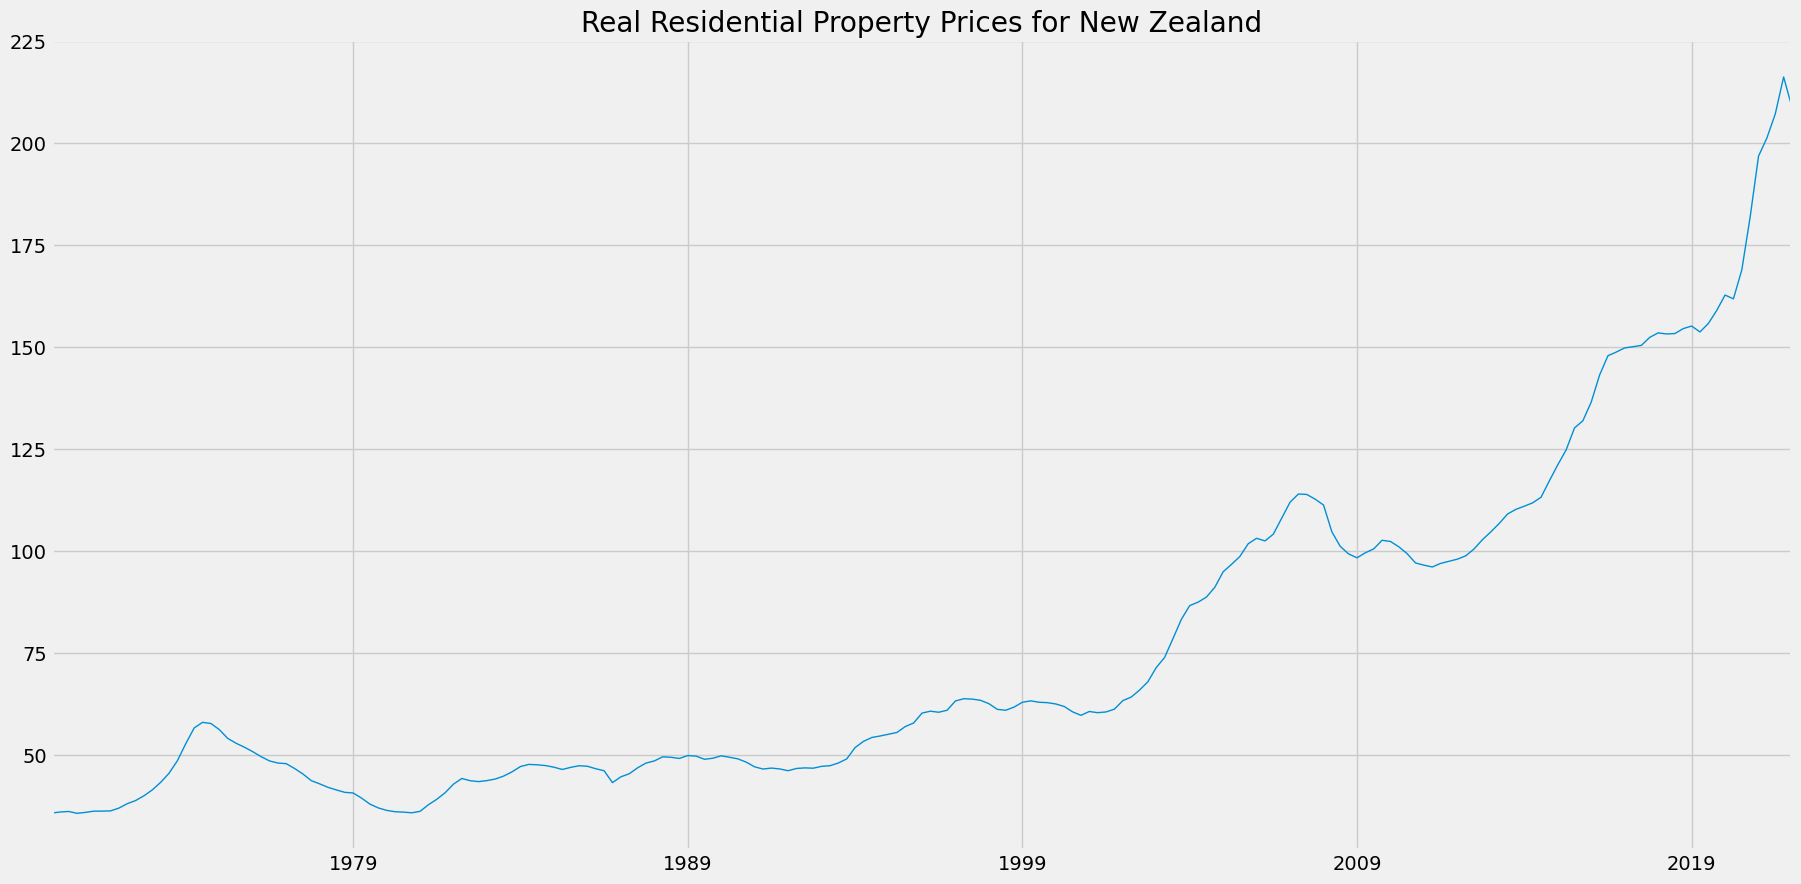

In [17]:
RPP.plot(figsize=(20, 10), title='Real Residential Property Prices for New Zealand', lw=1)

In [86]:
all_results = []
for myid in RPP_df.index:
    results = fred.get_series(myid)
    results.to_frame(name=myid)
    all_results.append(results)

In [87]:
type(all_results)

list

In [88]:
all_results[0]

1970-01-01      2.5147
1970-04-01      2.5714
1970-07-01      2.6281
1970-10-01      2.7010
1971-01-01      2.7860
                ...   
2021-01-01    232.0061
2021-04-01    240.3853
2021-07-01    252.8815
2021-10-01    267.7825
2022-01-01    263.1805
Length: 209, dtype: float64

In [89]:
all_results[1]

1971-01-01    10.7891
1971-04-01    11.6535
1971-07-01    11.4022
1971-10-01    10.9445
1972-01-01    11.6279
               ...   
2021-01-01    22.7404
2021-04-01    28.5164
2021-07-01    28.6702
2021-10-01    25.9273
2022-01-01    13.4369
Length: 205, dtype: float64

In [91]:
RPP_df.tail(2)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
ODCNPI03NZQ661N,ODCNPI03NZQ661N,2022-09-09,2022-09-09,Dwellings and Residential Buildings Permits Is...,1973-04-01,2022-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2022-08-11 14:58:56-05:00,1,OECD descriptor ID: ODCNPI03 OECD unit ID: IXO...
ODCNPI03NZQ156N,ODCNPI03NZQ156N,2022-09-09,2022-09-09,Dwellings and Residential Buildings Permits Is...,1965-04-01,2018-04-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2018-08-03 14:21:15-05:00,1,OECD descriptor ID: ODCNPI03 OECD unit ID: ML ...


In [90]:
pd.concat(all_results, axis=1)

,0,1,2,3,4,5
1965-04-01,NaN,NaN,NaN,NaN,NaN,2267.666667
1965-07-01,NaN,NaN,NaN,NaN,NaN,2347.666667
1965-10-01,NaN,NaN,NaN,NaN,NaN,2100.666667
1966-01-01,NaN,NaN,NaN,NaN,NaN,1928.000000
1966-04-01,NaN,NaN,NaN,NaN,NaN,2021.666667
...,...,...,...,...,...,...
2021-01-01,232.0061,22.7404,196.8574,20.9016,152.970662,NaN
2021-04-01,240.3853,28.5164,201.3281,24.3592,184.461153,NaN
2021-07-01,252.8815,28.6702,207.1979,22.6206,195.356037,NaN
2021-10-01,267.7825,25.9273,216.2783,18.8565,189.709568,NaN
